<a href="https://colab.research.google.com/github/carolsworld/DeepfakeDetector/blob/main/deepfakedetectionResNet152V2_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a notebook for implementing my model (based on ResNet152V2) for checking whether a video is a real video or deepfake video**

## Step 1 - In a new Google Colab notebook, turn on GPU in runtime

In [1]:
# Check GPU information 
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec  8 21:01:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Step 2 - Upload the video and model to Google Drive

Create several folders in [Google Drive](https://drive.google.com/drive/my-drive) 

Save the videos (.mp4) and model (.h5) inside the following three folders:

*  My Drive/MyVideo/Real/yourrealvideo.mp4
*  My Drive/MyVideo/Fake/yourfakevideo.mp4
*  My Drive/MyModel/my_ResNet152V2.h5

Also create the following folders for keeping the frames and chopped faces during image processing.

* My Drive/MyVideo/Frames/Real/realframestobecreated.jpg
* My Drive/MyVideo/Frames/Fake/fakeframestobecreated.jpg
* My Drive/MyVideo/Faces/Real/realfacestobecreated.jpg
* My Drive/MyVideo/Faces/Fake/fakefacestobecreated.jpg

In [2]:
# Confirm Google Drive is connected with Google Colab
google = !if [ -d 'GDrive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/GDrive/')
  
!if [ -d 'GDrive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi

Mounted at /content/GDrive/
Connection to Google drive successful


In [3]:
# List the video files and model in Google drive which are to be transferred to a temporary directory in Google Colab
!ls GDrive/My\ Drive/MyVideo/Real/
!ls GDrive/My\ Drive/MyVideo/Fake/
!ls GDrive/My\ Drive/MyModel/

BO_1.mp4  EM_1.mp4  JL_1.mp4  QE_1.mp4	TC_1.mp4
BO_0.mp4  EM_0.mp4  JL_0.mp4  QE_0.mp4	TC_0.mp4
my_ResNet152V2.h5


## Step 3 - Create a temporary directory in Google Colab. Copy the mp4 files and the model from your Google Drive to Google Colab

In [4]:
# Set up environment and import libraries in Google Colab
!pip install --upgrade pip > /dev/null
!pip install scikit-image
!pip install opencv-python

In [5]:
# Import libraries and modules in Google Colab
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
import math
import os 

In [6]:
# Make a temporarty directory in Google colab
!mkdir -p /content/DetectionTest/Sources/Real > /dev/null
!mkdir -p /content/DetectionTest/Sources/Fake > /dev/null
!mkdir -p /content/DetectionTest/Sources/frames/real > /dev/null
!mkdir -p /content/DetectionTest/Sources/frames/fake > /dev/null
!mkdir -p /content/DetectionTest/Sources/faces/real > /dev/null
!mkdir -p /content/DetectionTest/Sources/faces/fake > /dev/null
!mkdir -p /content/DetectionTest/Model > /dev/null

# copy video stored in Google Drive to Google Colab
!cp GDrive/My\ Drive/MyVideo/Real/*.mp4 DetectionTest/Sources/Real/
!cp GDrive/My\ Drive/MyVideo/Fake/*.mp4 DetectionTest/Sources/Fake/

# copy model stored in Google Drive to Google Colab
!cp GDrive/My\ Drive/MyModel/*.h5 DetectionTest/Model/

# List files Google Colab's temporary directory 
!ls /content/DetectionTest/Sources/Real
!ls /content/DetectionTest/Sources/Fake
!ls /content/DetectionTest/Model

BO_1.mp4  EM_1.mp4  JL_1.mp4  QE_1.mp4	TC_1.mp4
BO_0.mp4  EM_0.mp4  JL_0.mp4  QE_0.mp4	TC_0.mp4
my_ResNet152V2.h5


## Step 4 - Extract frames from the video

### Real videos

In [7]:
# Folder path contains the videos
INPUT_VIDEOS_PATH = '/content/DetectionTest/Sources/Real'

# Folder path for storing image frames to be extracted from videos
OUTPUT_FRAMES_PATH = '/content/DetectionTest/Sources/frames/real'

# Create variables  
one_frame_each = 120                                                            # Para = 24, Extract 1 frame from a video for every 24 frames, around 1 second (DFDpreview)

!if [ -d {OUTPUT_FRAMES_PATH} ]; then echo "Output to be stored in "{OUTPUT_FRAMES_PATH} ; else mkdir {OUTPUT_FRAMES_PATH} && echo "Output directory created"; fi

videofiles = !ls {INPUT_VIDEOS_PATH}/*.mp4                                      # Video file names in INPUT VIDEOS PATH

Output to be stored in /content/DetectionTest/Sources/frames/real


In [8]:
for videofile in videofiles:
    count = 0
    success = True
    filename = os.path.basename(videofile)
    vidcap = cv2.VideoCapture(videofile)

    while success:
        if (count%one_frame_each == 0):                                             # checks frame number and keeps one_frame_each          
            success, image = vidcap.read()                                           # reads next frame           
            if image.shape[1]>640:                                                  # if image width > 640, resize it
                tmp = resize(image, (math.floor(640 / image.shape[1] * image.shape[0]), 640))
            plt.imsave("%s/%s%d.jpg" % (OUTPUT_FRAMES_PATH,filename,count), tmp, format='jpg') # saves images to frame folder
            print ('*', end="")
        else:
            success,image = vidcap.read()                                           # reads next frame
        count += 1                                                                  # loops counter


**************

In [11]:
# List the image frames in Google Colab's temporary directory 
!ls /content/DetectionTest/Sources/frames/real

# Copy the frames to Google Drive
!cp /content/DetectionTest/Sources/frames/real/* GDrive/My\ Drive/MyVideo/Frames/Real


BO_1.mp40.jpg	 EM_1.mp4120.jpg  JL_1.mp4240.jpg  TC_1.mp40.jpg
BO_1.mp4120.jpg  EM_1.mp4240.jpg  QE_1.mp40.jpg    TC_1.mp4120.jpg
BO_1.mp4240.jpg  JL_1.mp40.jpg	  QE_1.mp4120.jpg
EM_1.mp40.jpg	 JL_1.mp4120.jpg  QE_1.mp4240.jpg


In [13]:
# List the image frames in Google Drive 
!ls GDrive/My\ Drive/MyVideo/Frames/Real

BO_1.mp40.jpg	 EM_1.mp4120.jpg  JL_1.mp4240.jpg  TC_1.mp40.jpg
BO_1.mp4120.jpg  EM_1.mp4240.jpg  QE_1.mp40.jpg    TC_1.mp4120.jpg
BO_1.mp4240.jpg  JL_1.mp40.jpg	  QE_1.mp4120.jpg
EM_1.mp40.jpg	 JL_1.mp4120.jpg  QE_1.mp4240.jpg


### Fake videos

In [9]:
# Folder path contains the videos
INPUT_VIDEOS_PATH = '/content/DetectionTest/Sources/Fake'

# Folder path for storing image frames to be extracted from videos
OUTPUT_FRAMES_PATH = '/content/DetectionTest/Sources/frames/fake'

# Create variables  
one_frame_each = 120                                                            # Para = 24, Extract 1 frame from a video for every 24 frames, around 1 second (DFDpreview)

!if [ -d {OUTPUT_FRAMES_PATH} ]; then echo "Output to be stored in "{OUTPUT_FRAMES_PATH} ; else mkdir {OUTPUT_FRAMES_PATH} && echo "Output directory created"; fi

videofiles = !ls {INPUT_VIDEOS_PATH}/*.mp4                                      # Video file names in INPUT VIDEOS PATH

Output to be stored in /content/DetectionTest/Sources/frames/fake


In [10]:
for videofile in videofiles:
    count = 0
    success = True
    filename = os.path.basename(videofile)
    vidcap = cv2.VideoCapture(videofile)

    while success:
        if (count%one_frame_each == 0):                                             # checks frame number and keeps one_frame_each          
            success, image = vidcap.read()                                           # reads next frame           
            if image.shape[1]>640:                                                  # if image width > 640, resize it
                tmp = resize(image, (math.floor(640 / image.shape[1] * image.shape[0]), 640))
            plt.imsave("%s/%s%d.jpg" % (OUTPUT_FRAMES_PATH,filename,count), tmp, format='jpg') # saves images to frame folder
            print ('*', end="")
        else:
            success,image = vidcap.read()                                           # reads next frame
        count += 1                                                                  # loops counter


*************

In [12]:
# List the image frames in Google Colab's temporary directory 
!ls /content/DetectionTest/Sources/frames/fake

# Copy the frames to Google Drive
!cp /content/DetectionTest/Sources/frames/fake/* GDrive/My\ Drive/MyVideo/Frames/Fake


BO_0.mp40.jpg	 JL_0.mp40.jpg	  QE_0.mp4120.jpg  TC_0.mp4240.jpg
BO_0.mp4120.jpg  JL_0.mp4120.jpg  QE_0.mp4240.jpg
EM_0.mp40.jpg	 JL_0.mp4240.jpg  TC_0.mp40.jpg
EM_0.mp4120.jpg  QE_0.mp40.jpg	  TC_0.mp4120.jpg


In [14]:
# List the image frames in Google Drive 
!ls GDrive/My\ Drive/MyVideo/Frames/Fake

BO_0.mp40.jpg	 JL_0.mp40.jpg	  QE_0.mp4120.jpg  TC_0.mp4240.jpg
BO_0.mp4120.jpg  JL_0.mp4120.jpg  QE_0.mp4240.jpg
EM_0.mp40.jpg	 JL_0.mp4240.jpg  TC_0.mp40.jpg
EM_0.mp4120.jpg  QE_0.mp40.jpg	  TC_0.mp4120.jpg


## Step 5 - Extract faces from the frames

In [15]:
!apt-get install build-essential cmake
!apt-get install libopenblas-dev liblapack-dev
!pip install dlib
!pip install face_recognition
!pip install opencv-python
!pip install opencv-contrib-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
liblapack-dev is already the newest version (3.7.1-4ubuntu1).
libopenblas-dev is already the newest version (0.2.20+ds-4).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     |████████████████████████████████| 100.1 MB 25 kB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=2433d4c36be42876aa5522510b5994301da7ab6dcad746371014d3dee158c6bb
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face

In [16]:
# Import OpenCV and face_recognition libraries to extract the faces from frames
from PIL import Image
import cv2
import face_recognition

### Real video images

In [17]:
# Folder path contains the frames
INPUT_FRAMES_PATH = '/content/DetectionTest/Sources/frames/real'

# Folder path for storing faces to be extracted from images
OUTPUT_FACES_PATH = '/content/DetectionTest/Sources/faces/real'

!if [ -d {OUTPUT_FACES_PATH} ]; then echo "Output to be stored in "{OUTPUT_FACES_PATH} ; else mkdir {OUTPUT_FACES_PATH} && echo "Output directory created"; fi

imagefiles = !ls {INPUT_FRAMES_PATH}/*.jpg                                      # Image file names in INPUT FRAMES PATH

# Extract face from all image files in the given directory
for imagefile in imagefiles:
    filename = os.path.basename(imagefile)
    image = face_recognition.load_image_file(imagefile)
    face_locations = face_recognition.face_locations(image)
    print("Found {} face(s) in this photograph - %s.".format(len(face_locations)),filename)

    %matplotlib inline
    plt.rcParams['figure.figsize'] = [32, 8]

    for face_location in face_locations:
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {} for %s".format(top, left, bottom, right), filename)
        face_image = image[top:bottom, left:right]

        if(len(face_locations) == 1):
            cv2.imwrite("%s/%sF.jpg" % (OUTPUT_FACES_PATH,filename), face_image)
            print ('*', end="")

Output to be stored in /content/DetectionTest/Sources/faces/real
Found 1 face(s) in this photograph - %s. BO_1.mp40.jpg
A face is located at pixel location Top: 66, Left: 275, Bottom: 156, Right: 364 for %s BO_1.mp40.jpg
*Found 1 face(s) in this photograph - %s. BO_1.mp4120.jpg
A face is located at pixel location Top: 80, Left: 295, Bottom: 155, Right: 370 for %s BO_1.mp4120.jpg
*Found 1 face(s) in this photograph - %s. BO_1.mp4240.jpg
A face is located at pixel location Top: 66, Left: 285, Bottom: 156, Right: 374 for %s BO_1.mp4240.jpg
*Found 1 face(s) in this photograph - %s. EM_1.mp40.jpg
A face is located at pixel location Top: 82, Left: 253, Bottom: 211, Right: 382 for %s EM_1.mp40.jpg
*Found 1 face(s) in this photograph - %s. EM_1.mp4120.jpg
A face is located at pixel location Top: 82, Left: 239, Bottom: 211, Right: 368 for %s EM_1.mp4120.jpg
*Found 1 face(s) in this photograph - %s. EM_1.mp4240.jpg
A face is located at pixel location Top: 67, Left: 268, Bottom: 196, Right: 397 f

In [19]:
# Count number of faces in Google Colab's temporary directory 
!ls /content/DetectionTest/Sources/faces/real | wc -l

14


In [22]:
# List the faces in Google Colab's temporary directory 
!ls /content/DetectionTest/Sources/faces/real

BO_1.mp40.jpgF.jpg    EM_1.mp4240.jpgF.jpg  QE_1.mp4120.jpgF.jpg
BO_1.mp4120.jpgF.jpg  JL_1.mp40.jpgF.jpg    QE_1.mp4240.jpgF.jpg
BO_1.mp4240.jpgF.jpg  JL_1.mp4120.jpgF.jpg  TC_1.mp40.jpgF.jpg
EM_1.mp40.jpgF.jpg    JL_1.mp4240.jpgF.jpg  TC_1.mp4120.jpgF.jpg
EM_1.mp4120.jpgF.jpg  QE_1.mp40.jpgF.jpg


In [24]:
# Copy the faces to Google Drive
!cp /content/DetectionTest/Sources/faces/real/* GDrive/My\ Drive/MyVideo/Faces/Real

In [26]:
# List the faces in Google Drive 
!ls GDrive/My\ Drive/MyVideo/Faces/Real

BO_1.mp40.jpgF.jpg    EM_1.mp4240.jpgF.jpg  QE_1.mp4120.jpgF.jpg
BO_1.mp4120.jpgF.jpg  JL_1.mp40.jpgF.jpg    QE_1.mp4240.jpgF.jpg
BO_1.mp4240.jpgF.jpg  JL_1.mp4120.jpgF.jpg  TC_1.mp40.jpgF.jpg
EM_1.mp40.jpgF.jpg    JL_1.mp4240.jpgF.jpg  TC_1.mp4120.jpgF.jpg
EM_1.mp4120.jpgF.jpg  QE_1.mp40.jpgF.jpg


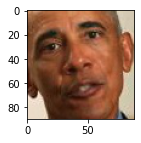

In [29]:
# Visualise the face
plt.figure(figsize = (5,2))
viewreal = plt.imread("/content/DetectionTest/Sources/faces/real/BO_1.mp40.jpgF.jpg")   # update file name
plt.imshow(viewreal)

### Fake video images

In [18]:
# Folder path contains the frames
INPUT_FRAMES_PATH = '/content/DetectionTest/Sources/frames/fake'

# Folder path for storing faces to be extracted from images
OUTPUT_FACES_PATH = '/content/DetectionTest/Sources/faces/fake'

!if [ -d {OUTPUT_FACES_PATH} ]; then echo "Output to be stored in "{OUTPUT_FACES_PATH} ; else mkdir {OUTPUT_FACES_PATH} && echo "Output directory created"; fi

imagefiles = !ls {INPUT_FRAMES_PATH}/*.jpg                                      # Image file names in INPUT FRAMES PATH

# Extract face from all image files in the given directory
for imagefile in imagefiles:
    filename = os.path.basename(imagefile)
    image = face_recognition.load_image_file(imagefile)
    face_locations = face_recognition.face_locations(image)
    print("Found {} face(s) in this photograph - %s.".format(len(face_locations)),filename)

    %matplotlib inline
    plt.rcParams['figure.figsize'] = [32, 8]

    for face_location in face_locations:
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {} for %s".format(top, left, bottom, right), filename)
        face_image = image[top:bottom, left:right]

        if(len(face_locations) == 1):
            cv2.imwrite("%s/%sF.jpg" % (OUTPUT_FACES_PATH,filename), face_image)
            print ('*', end="")

Output to be stored in /content/DetectionTest/Sources/faces/fake
Found 1 face(s) in this photograph - %s. BO_0.mp40.jpg
A face is located at pixel location Top: 80, Left: 247, Bottom: 187, Right: 354 for %s BO_0.mp40.jpg
*Found 1 face(s) in this photograph - %s. BO_0.mp4120.jpg
A face is located at pixel location Top: 76, Left: 255, Bottom: 166, Right: 344 for %s BO_0.mp4120.jpg
*Found 1 face(s) in this photograph - %s. EM_0.mp40.jpg
A face is located at pixel location Top: 92, Left: 235, Bottom: 199, Right: 342 for %s EM_0.mp40.jpg
*Found 1 face(s) in this photograph - %s. EM_0.mp4120.jpg
A face is located at pixel location Top: 96, Left: 253, Bottom: 225, Right: 382 for %s EM_0.mp4120.jpg
*Found 1 face(s) in this photograph - %s. JL_0.mp40.jpg
A face is located at pixel location Top: 66, Left: 325, Bottom: 156, Right: 414 for %s JL_0.mp40.jpg
*Found 1 face(s) in this photograph - %s. JL_0.mp4120.jpg
A face is located at pixel location Top: 76, Left: 305, Bottom: 166, Right: 394 for %

In [20]:
# Count number of faces in Google Colab's temporary directory 
!ls /content/DetectionTest/Sources/faces/fake | wc -l

12


In [21]:
# List the faces in Google Colab's temporary directory 
!ls /content/DetectionTest/Sources/faces/fake

BO_0.mp40.jpgF.jpg    JL_0.mp40.jpgF.jpg    QE_0.mp4240.jpgF.jpg
BO_0.mp4120.jpgF.jpg  JL_0.mp4120.jpgF.jpg  TC_0.mp40.jpgF.jpg
EM_0.mp40.jpgF.jpg    JL_0.mp4240.jpgF.jpg  TC_0.mp4120.jpgF.jpg
EM_0.mp4120.jpgF.jpg  QE_0.mp4120.jpgF.jpg  TC_0.mp4240.jpgF.jpg


In [23]:
# Copy the faces to Google Drive
!cp /content/DetectionTest/Sources/faces/fake/* GDrive/My\ Drive/MyVideo/Faces/Fake

In [25]:
# List the faces in Google Drive 
!ls GDrive/My\ Drive/MyVideo/Faces/Fake

BO_0.mp40.jpgF.jpg    JL_0.mp40.jpgF.jpg    QE_0.mp4240.jpgF.jpg
BO_0.mp4120.jpgF.jpg  JL_0.mp4120.jpgF.jpg  TC_0.mp40.jpgF.jpg
EM_0.mp40.jpgF.jpg    JL_0.mp4240.jpgF.jpg  TC_0.mp4120.jpgF.jpg
EM_0.mp4120.jpgF.jpg  QE_0.mp4120.jpgF.jpg  TC_0.mp4240.jpgF.jpg


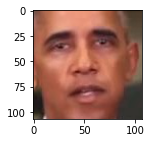

In [28]:
# Visualise the face
plt.figure(figsize = (5,2))
viewreal = plt.imread("/content/DetectionTest/Sources/faces/fake/BO_0.mp40.jpgF.jpg")   # update file name
plt.imshow(viewreal)

## Step 6 - Create my test dataset

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [37]:
# Set path 
base_dir = '/content/DetectionTest/Sources/'
test_dir = os.path.join(base_dir, 'faces')

# Directory with our test fake pictures
test_fake_dir = os.path.join(test_dir, 'fake')

# Directory with our test real pictures
test_real_dir = os.path.join(test_dir, 'real')

# Print some file names to confirm the right directories are connected 
test_real_fnames = os.listdir(test_real_dir)
test_real_fnames.sort()
print(test_real_fnames[:5])

test_fake_fnames = os.listdir(test_fake_dir)
test_fake_fnames.sort()
print(test_fake_fnames[:5])

# Count the number of real and fake images of faces in the train and validation directories
print('total real video images for testing:', len(os.listdir(test_real_dir)))
print('total fake video images for testing:', len(os.listdir(test_fake_dir)))

['BO_1.mp40.jpgF.jpg', 'BO_1.mp4120.jpgF.jpg', 'BO_1.mp4240.jpgF.jpg', 'EM_1.mp40.jpgF.jpg', 'EM_1.mp4120.jpgF.jpg']
['BO_0.mp40.jpgF.jpg', 'BO_0.mp4120.jpgF.jpg', 'EM_0.mp40.jpgF.jpg', 'EM_0.mp4120.jpgF.jpg', 'JL_0.mp40.jpgF.jpg']
total real video images for testing: 14
total fake video images for testing: 12


In [38]:
# Define matplotlib parameters for output images as 4x4 images
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0                               # index for image iteration

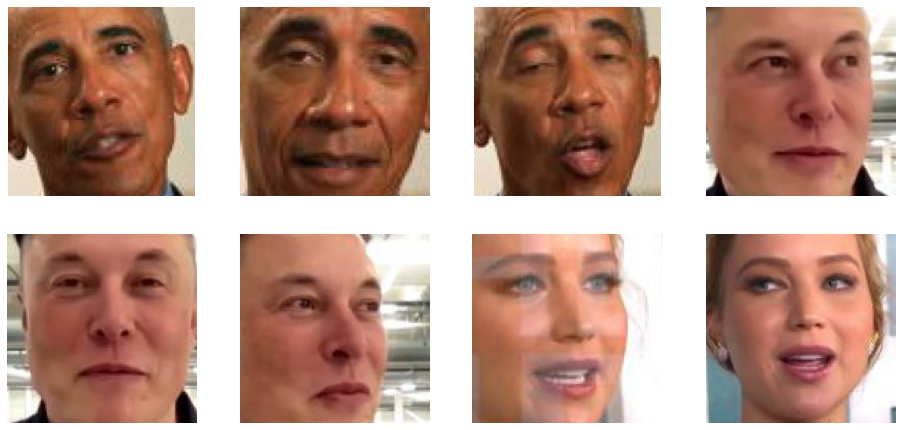

In [39]:
# Show a batch of 8 real images 
# Rerun the cell to fetch a new batch of images 

fig = plt.gcf()                               # set up matplotlib fig
fig.set_size_inches(ncols * 4, nrows * 4)     # size matplotlib fig to fit into a 4x4 image

pic_index += 8
next_real_pix = [os.path.join(test_real_dir, fname) 
                for fname in test_real_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_real_pix):
  sp = plt.subplot(nrows, ncols, i + 1)       # Set up subplot, subplot indices start at 1
  sp.axis('Off')                              # Turn off axis

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [41]:
pic_index = 0                               # reset index for image iteration for fake images

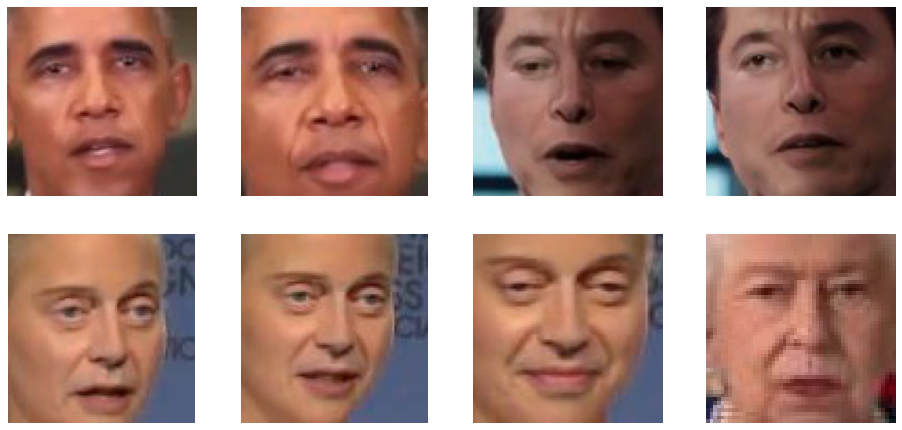

In [42]:
# Show a batch of 8 fake images
# Rerun the cell to fetch a new batch of images 

fig = plt.gcf()                               # set up matplotlib fig
fig.set_size_inches(ncols * 4, nrows * 4)     # size matplotlib fig to fit into a 4x4 image

pic_index += 8
next_fake_pix = [os.path.join(test_fake_dir, fname) 
                for fname in test_fake_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_fake_pix):
  sp = plt.subplot(nrows, ncols, i + 1)       # Set up subplot, subplot indices start at 1
  sp.axis('Off')                              # Turn off axis

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [49]:
BATCH_SIZE = 40
IMG_SIZE = (150, 150)

# Create test dataset with dataset from directory method
test_dataset = tensorflow.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=False,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)


Found 26 files belonging to 2 classes.


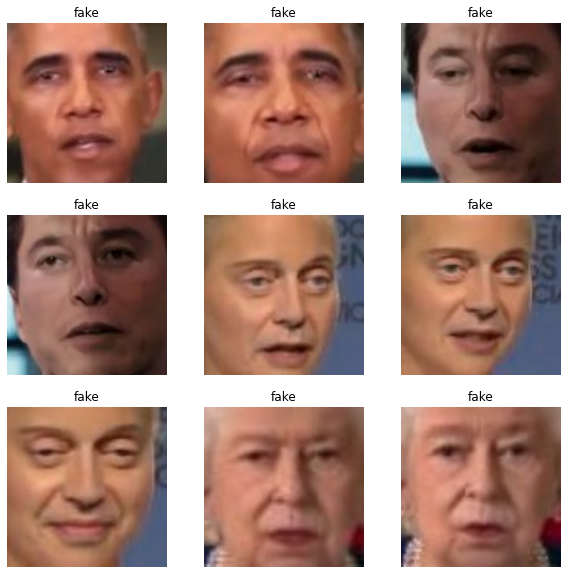

In [50]:
# Check the result of test dataset
class_names = test_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [51]:
# Performance enhancement
AUTOTUNE = tensorflow.data.AUTOTUNE

test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Step 7 - Load the Model

In [52]:
model = keras.models.load_model('/content/DetectionTest/Model/my_ResNet152V2.h5')

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 150, 150, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

## Step 8 - Make prediction with unseen test dataset from the wild

In [62]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 2s 2s/step - loss: 3.3046 - accuracy: 0.6538
Test accuracy : 0.6538461446762085


Predictions:
 [1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


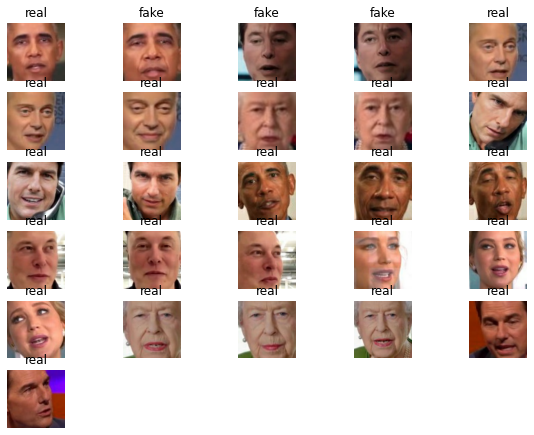

In [64]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tensorflow.nn.sigmoid(predictions)
predictions = tensorflow.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(26):
  ax = plt.subplot(8, 5, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [70]:
# Upload the real faces to make prediction 
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/GDrive/My Drive/MyVideo/Faces/Real/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  if classes[0]>0.5:
    print(fn + " is real")
  else:
    print(fn + " is deepfake")

Saving BO_1.mp40.jpgF.jpg to BO_1.mp40.jpgF (5).jpg
Saving BO_1.mp4120.jpgF.jpg to BO_1.mp4120.jpgF (5).jpg
Saving BO_1.mp4240.jpgF.jpg to BO_1.mp4240.jpgF (5).jpg
Saving EM_1.mp40.jpgF.jpg to EM_1.mp40.jpgF (5).jpg
Saving EM_1.mp4120.jpgF.jpg to EM_1.mp4120.jpgF (5).jpg
Saving EM_1.mp4240.jpgF.jpg to EM_1.mp4240.jpgF (5).jpg
Saving JL_1.mp40.jpgF.jpg to JL_1.mp40.jpgF (5).jpg
Saving JL_1.mp4120.jpgF.jpg to JL_1.mp4120.jpgF (5).jpg
Saving JL_1.mp4240.jpgF.jpg to JL_1.mp4240.jpgF (5).jpg
Saving QE_1.mp40.jpgF.jpg to QE_1.mp40.jpgF (5).jpg
Saving QE_1.mp4120.jpgF.jpg to QE_1.mp4120.jpgF (5).jpg
Saving QE_1.mp4240.jpgF.jpg to QE_1.mp4240.jpgF (5).jpg
Saving TC_1.mp40.jpgF.jpg to TC_1.mp40.jpgF (5).jpg
Saving TC_1.mp4120.jpgF.jpg to TC_1.mp4120.jpgF (5).jpg
BO_1.mp40.jpgF.jpg is real
BO_1.mp4120.jpgF.jpg is real
BO_1.mp4240.jpgF.jpg is real
EM_1.mp40.jpgF.jpg is real
EM_1.mp4120.jpgF.jpg is real
EM_1.mp4240.jpgF.jpg is real
JL_1.mp40.jpgF.jpg is real
JL_1.mp4120.jpgF.jpg is real
JL_1.mp424

In [71]:
# Upload the fake faces to make prediction 
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/GDrive/My Drive/MyVideo/Faces/Fake/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  if classes[0]>0.5:
    print(fn + " is real")
  else:
    print(fn + " is deepfake")

Saving BO_0.mp40.jpgF.jpg to BO_0.mp40.jpgF.jpg
Saving BO_0.mp4120.jpgF.jpg to BO_0.mp4120.jpgF.jpg
Saving EM_0.mp40.jpgF.jpg to EM_0.mp40.jpgF.jpg
Saving EM_0.mp4120.jpgF.jpg to EM_0.mp4120.jpgF.jpg
Saving JL_0.mp40.jpgF.jpg to JL_0.mp40.jpgF.jpg
Saving JL_0.mp4120.jpgF.jpg to JL_0.mp4120.jpgF.jpg
Saving JL_0.mp4240.jpgF.jpg to JL_0.mp4240.jpgF.jpg
Saving QE_0.mp4120.jpgF.jpg to QE_0.mp4120.jpgF.jpg
Saving QE_0.mp4240.jpgF.jpg to QE_0.mp4240.jpgF.jpg
Saving TC_0.mp40.jpgF.jpg to TC_0.mp40.jpgF.jpg
Saving TC_0.mp4120.jpgF.jpg to TC_0.mp4120.jpgF.jpg
Saving TC_0.mp4240.jpgF.jpg to TC_0.mp4240.jpgF.jpg
BO_0.mp40.jpgF.jpg is real
BO_0.mp4120.jpgF.jpg is deepfake
EM_0.mp40.jpgF.jpg is real
EM_0.mp4120.jpgF.jpg is deepfake
JL_0.mp40.jpgF.jpg is real
JL_0.mp4120.jpgF.jpg is real
JL_0.mp4240.jpgF.jpg is real
QE_0.mp4120.jpgF.jpg is real
QE_0.mp4240.jpgF.jpg is real
TC_0.mp40.jpgF.jpg is real
TC_0.mp4120.jpgF.jpg is real
TC_0.mp4240.jpgF.jpg is real


End of notebook